In [1]:
%config InlineBackend.figure_format = "retina"
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

import numpy as np

In [2]:
data_dir = "/data/jdli/gaia/"
tr_file = "ap17_xpcont_cut.npy"

rawdata = np.load(data_dir + tr_file, allow_pickle=True).item()



In [3]:

rng = np.random.default_rng()

tr_size, val_size = 4000, 1000
tot_size = tr_size + val_size
# ind = rng.random.choice(np.arange(len(rawdata['df'])), size=tot_size, replace=False)

ind = rng.choice(np.arange(len(rawdata['df'])), size=tot_size, replace=False)

tr_ind, val_ind = ind[:tr_size], ind[tr_size:tot_size]

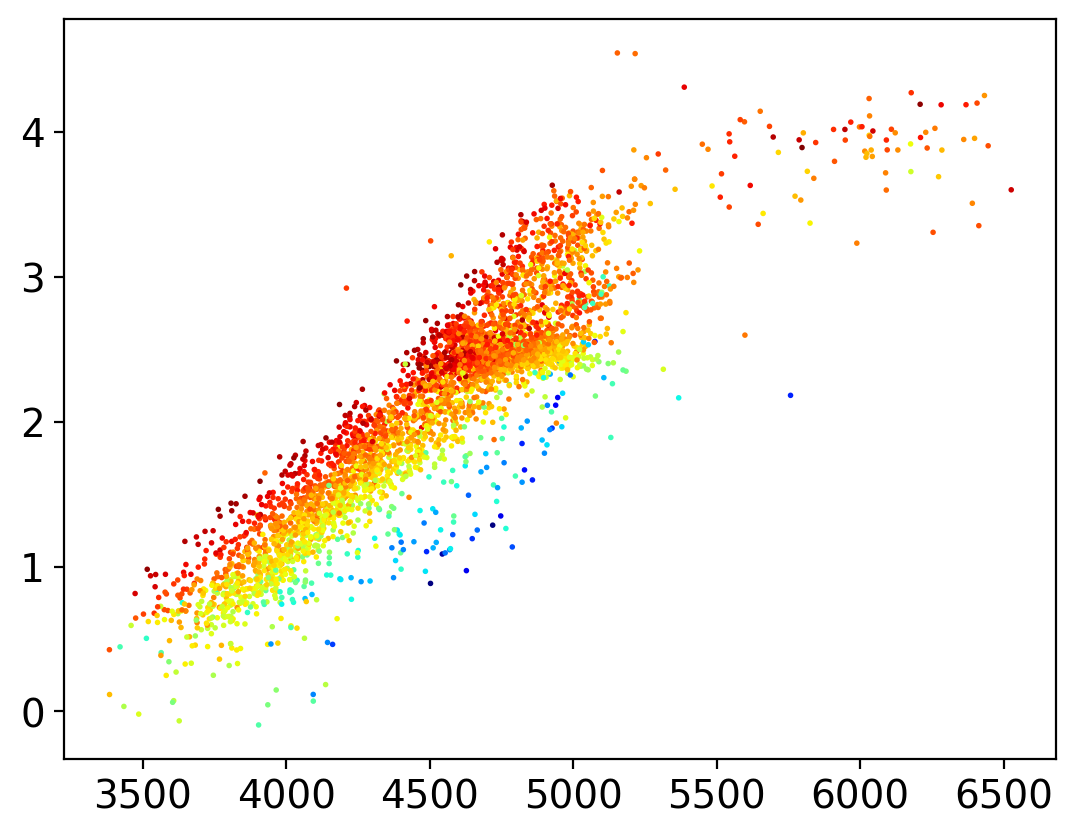

In [4]:
idx = 5000

plt.scatter(rawdata['df']['TEFF'].iloc[tr_ind], rawdata['df']['LOGG'].iloc[tr_ind],
            c=rawdata['df']['M_H'].iloc[tr_ind], 
            s=1,cmap='jet')

In [7]:
tr_df = rawdata['df'].iloc[tr_ind]
val_df = rawdata['df'].iloc[val_ind]

tr_labels = tr_df[['TEFF', 'LOGG']].values
val_labels = val_df[['TEFF', 'LOGG']].values

tr_bp = rawdata['bp_coef'][tr_ind]
tr_rp = rawdata['rp_coef'][tr_ind]

val_bp = rawdata['bp_coef'][val_ind]
val_rp = rawdata['rp_coef'][val_ind]

print(tr_df.shape, val_df.shape)

(4000, 16) (1000, 16)


In [8]:
print(val_bp.shape, val_rp.shape)
print(tr_bp.shape, tr_rp.shape)

(1000, 55) (1000, 55)
(4000, 55) (4000, 55)


In [12]:
import pickle

tr_file  = "ap17_xpcont_train_prtcl3.pickle"
val_file = "ap17_xpcont_validation_prtcl3.pickle"


# with open(data_dir+tr_file, 'wb') as handle:
#     pickle.dump({"bp_coef":tr_bp, "rp_coef":tr_rp, "labels":tr_labels}, 
#                 handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(tr_file, 'wb') as handle:
    pickle.dump({"bp_coef":tr_bp, "rp_coef":tr_rp, "labels":tr_labels}, 
                handle, protocol=None)
    



In [13]:
with open(val_file, 'wb') as handle:
    pickle.dump({"bp_coef":val_bp, "rp_coef":val_rp, "labels":val_labels}, 
                handle, protocol=None)

In [11]:
!ls -al /data/jdli/gaia

total 3907604
drwxrwxr-x.  4 jdli jdli      4096 Dec  1 08:16 .
drwxrwxrwx. 26 root root      4096 Nov 15 02:55 ..
-rw-rw-r--.  1 jdli jdli     35261 Oct 31 09:58 ap17_gxp.fits
-rw-rw-r--.  1 jdli jdli 390123475 Dec  1 04:46 ap17_wise_xpcont_cut.npy
-rw-rw-r--.  1 jdli jdli 187102995 Nov 17 04:02 ap17_xpcont_cut.npy
-rw-rw-r--.  1 jdli jdli   3552272 Nov 15 04:34 ap17_xpcont_train.pickle
-rw-rw-r--.  1 jdli jdli   3552310 Dec  1 08:16 ap17_xpcont_train_prtcl3.pickle
-rw-rw-r--.  1 jdli jdli  85522918 Nov 17 11:30 ap17_xpcont_trsnr300.npy
-rw-rw-r--.  1 jdli jdli    888272 Nov 15 04:42 ap17_xpcont_validation.pickle
-rw-rw-r--.  1 jdli jdli    888310 Dec  1 08:16 ap17_xpcont_validation_prtcl3.pickle
-rw-rw-r--.  1 jdli jdli 885662966 Nov  9 12:19 ap17_xpcut.npy
-rw-rw-r--.  1 jdli jdli 885916242 Nov  9 11:40 ap17_xp.npy
-rw-rw-r--.  1 jdli jdli 213274784 Nov  7 10:23 ap17_xp_post.npy
-rw-rw-r--.  1 jdli jdli 667734221 Nov  2 10:27 ap17_xp_raw.npy
-rw-rw-r--.  1 jdli jdli     38843 Oct 31